<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_2/Aula_3_Ticks_escalas_e_formatacao_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 

## Preparando conteúdo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", encoding = "ISO-8859-1",
                 skiprows = 3, sep = ";", skipfooter = 12,
                 thousands = ".", decimal = ",", engine = "python")
pd.options.display.float_format = "{:.2f}".format
use_col = df.mean().index.tolist()
use_col.insert(0, "Unidade da Federação")
use = df.loc[:,use_col]
use = use.set_index("Unidade da Federação")
use.sort_values(by = "Total") # crescente
total_ord = use.sort_values(by = "Total", ascending = False) # decrescente
total_ord = total_ord.drop("Total", axis = 1)
main_cols = total_ord.columns[6:]
total_ord = total_ord[main_cols]
total_ord = total_ord/1000000
total_ord.index = total_ord.index.str[3:] # Matar esse problema aqui de vez
ultimo_mes = total_ord.columns[-1]
gastos_ultimo_mes = total_ord[ultimo_mes]
gastos_prop_estado = gastos_ultimo_mes / gastos_ultimo_mes.sum()
tabelas_wiki = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
dados_populacao_raw = tabelas_wiki[0]
dados_populacao_raw

def limpeza(df1, df2):
  """limpeza, tratamento e join de dados"""
  df1 = df1.dropna().copy()
  df1.columns = ["posicao", "uf", "populacao", "porc", "pais"]
  df1.loc[:,"populacao"] = pd.to_numeric(df1.loc[:,"populacao"].str.replace(" ",""))
  df1 = df1.loc[:,["populacao", "uf"]]
  df1 = df1.set_index("uf")
  df1.index = df1.index.str.strip()

  for i in df2.index:
    df1.index = df1.index.str.replace(f"{i} {i}", i)

  return df1.join(df2)

gastos_e_populacao_recente = limpeza(dados_populacao_raw, gastos_ultimo_mes)

def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str): 
  # mes: str define que o tipo de mes só pode ser string
  # pd.DataFrame para definir que só pode ser DataFrame
  gastos_do_mes = todos_os_gastos.loc[:,mes]
  dados.loc[:, f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados.loc[:, f"gasto_por_habitante_{mes}"] = dados.loc[:, f"gastos_{mes}"] / dados.loc[:, "populacao"]

## Seguindo

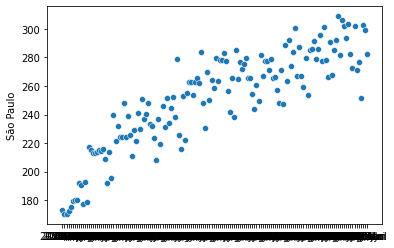

In [3]:
sns.scatterplot(x = total_ord.columns, y = total_ord.loc["São Paulo", :])

In [5]:
mensal = total_ord.T

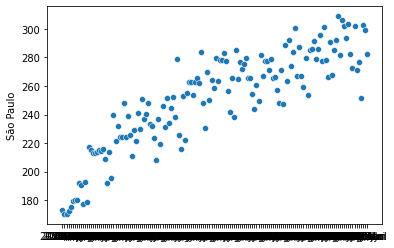

In [6]:
sns.scatterplot(data = mensal, x = mensal.index, y = "São Paulo")

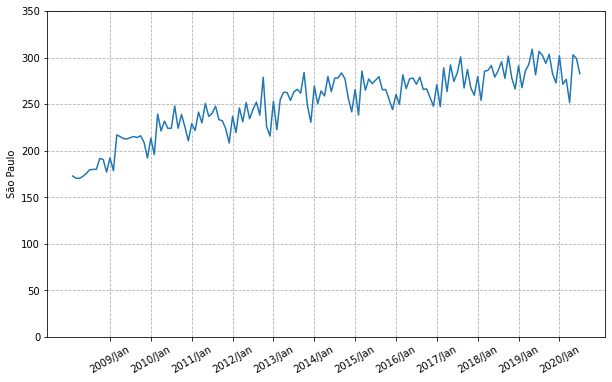

In [23]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
plt.ylim(0, 350)
plt.grid(linestyle = "--")
plt.show()

## Desafio 01 - Fazer o scatterplot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros

## Desafio 02 - Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e título nos dois eixos, alterando o tamanho dos títulos

### Resolvi fazer tudo junto, escolhendo outro estado pois sou de São Paulo e já vou manipular diversos parâmetros junto com os propostos no 2

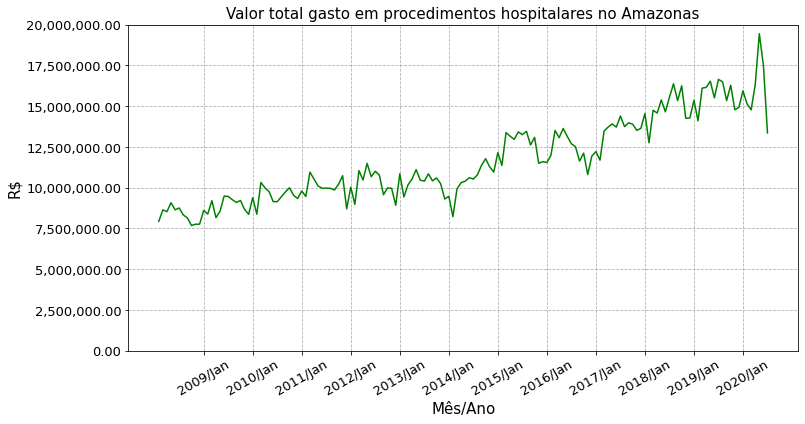

In [68]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "Amazonas", color = "green")
plt.title("Valor total gasto em procedimentos hospitalares no Amazonas", fontsize = 15)
plt.ylabel("R$", fontsize = 15)
plt.xlabel("Mês/Ano", fontsize = 15)
plt.xticks(rotation = 30)
ax.tick_params(axis = "both", labelsize = 13)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
plt.ylim(0, 20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x*1000000))) #https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
plt.grid(linestyle = "--")
plt.show()